### **Import necessary Python libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***Crate the data frame***

In [5]:
dataframe = pd.read_csv("F:\Practice\Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### **Data frame first 10 column**

In [6]:
print(dataframe.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

### **Convert the data type of the "rate" column to float and remove the denominator.**

In [7]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### **Summary of the data frame**

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# ***Note: There is no NULL value in dataframe.***

### **Type of Resturant**

Text(0.5, 0, 'Type of resturant')

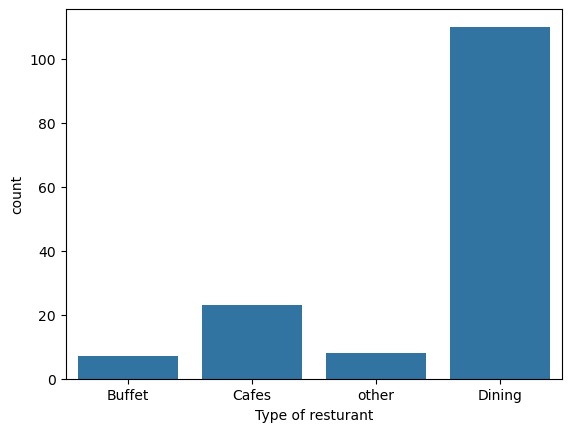

In [18]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of resturant")

# ***Note: The majority of the resturant fall into the dining category.***

### **Number of votes for per type**

Text(0, 0.5, 'Votes')

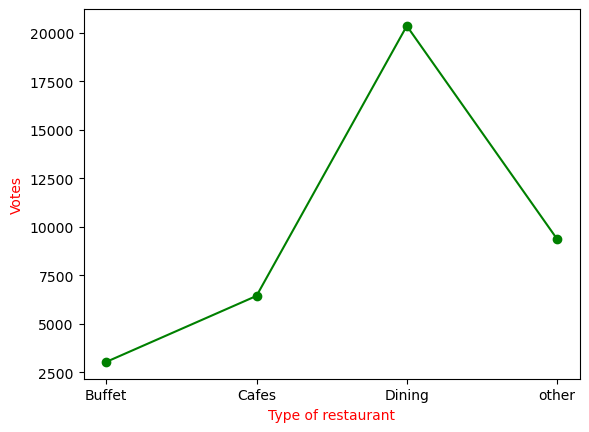

In [35]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant",c="red")
plt.ylabel("Votes",c="red")

### **Ratings**

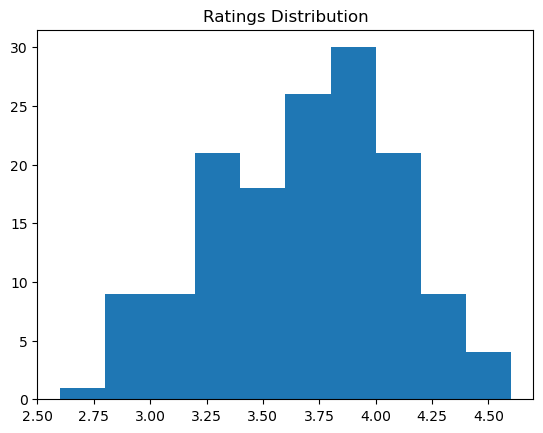

In [40]:
plt.hist(dataframe['rate'])
plt.title("Ratings Distribution")
plt.show()

# ***Note: The majority of restaurants received ratings from 3.5 to 4***

# **Money**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

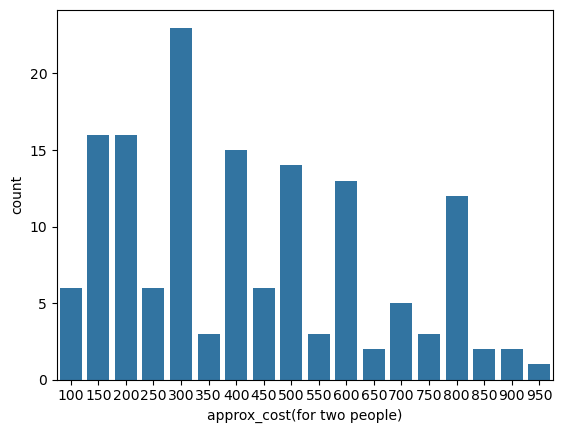

In [42]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# ***Note: The majority of couples prefer restaurants with an approximate cost of 300 Taka.***

### **Order**

<Axes: xlabel='online_order', ylabel='rate'>

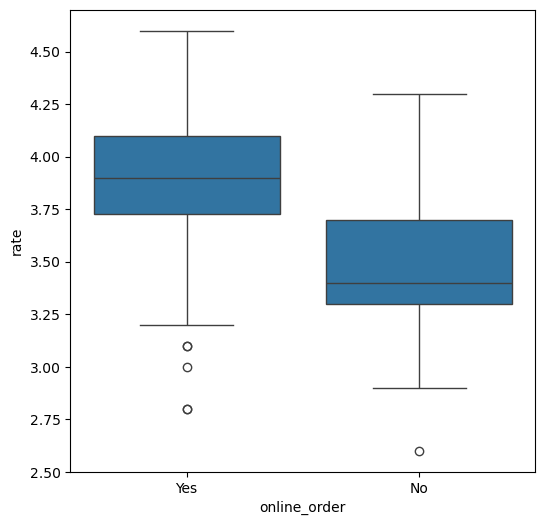

In [45]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data = dataframe)

# ***Note: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.***

### **Pivot Table**

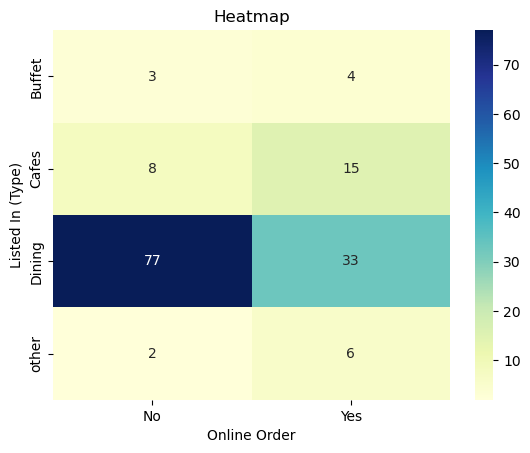

In [57]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',values='approx_cost(for two people)',aggfunc='count',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# ***Note: Dining restaurants primarily accept offline orders, whereas cafes primarity receive online orders. This suggests that clients prefer to place orders in person at restautants, but prefer online ordering at cafes.***